In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Creating the neuron class 
class neuron:
    def __init__(self, activationValue, weight, v):
        self.act = activationValue
        self.w = weight
        self.v = v

    #Activation function calculation
    def actFunction(self):
        self.act = 1.0 / (1.0 + math.exp(-1*self.v))
        return self.act

### FORWARD ###

#Weight Multiplication    
def weightProduct(weights, Nvalues):
    result = []
    for i in range(len(weights[0])):
        dotProduct = 0
        for j in range(len(weights)):
            dotProduct += weights[j][i] * Nvalues[j]
        result.append(dotProduct)
    return result


### BACKWARD ###

# Calculate the output gradient
def gradout(lmbd, err, out):
    g = []
    for i in range(len(out)):
        g.append(lmbd * err[i] * out[i]*(1 - out[i]))
    return g

# Calculate the h layer gradient
def gradh(lmbd, hs, go, hw):
    g = []
    for i in range(len(hs)):
        dp = 0
        for j in range(len(go)):
            dp += go[j] * hw[i][j]
        g.append(lmbd * hs[i] * (1-hs[i]) * dp)
    return g


def weightUpdateLayer(grad, neurons, weights, z):
    nw = []
    for i in range(len(weights)):
        for j in range(len(weights[0])):
            delta_w = z * grad[j] * neurons[i]
            w = delta_w + weights[i][j]
            nw.append(w)
    return nw

In [3]:
## Normalize data

def minmax(df, column):
    min = np.min(df[column])
    max = np.max(df[column])
    df[column] = (df[column] - min)/ (max - min)

In [4]:


array = pd.read_csv('ce889_dataCollection.csv', header=None)       # Load data

for i in range(4):      # Normalize every column
    minmax(array, i)

array = array.sample(frac=1)        # Randomize data
array = array.reset_index(drop=True)        #Reset index

trainlength = math.floor(70*len(array)/100)     #Split data (70% train)
Vallength = trainlength + math.floor((len(array) - trainlength)/2)      # 15% Validate

arrayTrain = array[0:trainlength]
arrayVal = array[trainlength:Vallength]
arrayTest = array[Vallength:]       # 15% Test
arrayTrain = np.array(arrayTrain)
arrayVal = np.array(arrayVal)
arrayTest = np.array(arrayTest)


In [5]:
arrayTrain

array([[0.48804289, 0.64208468, 0.48546559, 0.39954532],
       [0.72462887, 0.62424972, 0.38378771, 0.60975994],
       [0.50629112, 0.99252239, 0.4136164 , 0.28546101],
       ...,
       [0.51236519, 0.20071947, 0.73794043, 0.48209909],
       [0.77036239, 0.60920122, 0.3737283 , 0.82365775],
       [0.47924118, 0.17895407, 0.41819155, 0.49525466]])

In [6]:
#Randomize initial weights

x1_weights = np.random.rand(8)
x2_weights = np.random.rand(8)
h1_weights = np.random.rand(2)
h2_weights = np.random.rand(2)
h3_weights = np.random.rand(2)
h4_weights = np.random.rand(2)
h5_weights = np.random.rand(2)
h6_weights = np.random.rand(2)
h7_weights = np.random.rand(2)
h8_weights = np.random.rand(2)

inputs = np.delete(arrayTrain, np.s_[2:4], axis = 1)     # Drop output columns
Ys = np.delete(arrayTrain, np.s_[0:2], axis = 1)    # Drop input columns
lmbd = 1
zita = 0.5

## First forward 

x1 = neuron(inputs[0][0], x1_weights, None)
x2 = neuron(inputs[0][1], x2_weights, None)
weightsList = [x1.w, x2.w]
actList = [x1.act, x2.act]

# Calculate v values
v = []
for i in range(len(weightsList[0])):
    v.append(weightProduct(weightsList, inputs[0])[i])

#Build hidden layer
h1 = neuron(None, h1_weights, v[0])
h2 = neuron(None, h2_weights, v[1])
h3 = neuron(None, h3_weights, v[2])
h4 = neuron(None, h4_weights, v[3])
h5 = neuron(None, h5_weights, v[4])
h6 = neuron(None, h6_weights, v[5])
h7 = neuron(None, h7_weights, v[6])
h8 = neuron(None, h8_weights, v[7])


# Calculate activation values
av1 = h1.actFunction()
av2 = h2.actFunction()
av3 = h3.actFunction()
av4 = h4.actFunction()
av5 = h5.actFunction()
av6 = h6.actFunction()
av7 = h7.actFunction()
av8 = h8.actFunction()
avs = [av1, av2, av3, av4, av5 ,av6 ,av7 ,av8]
weightsListH = [h1.w, h2.w, h3.w, h4.w, h5.w, h6.w, h7.w, h8.w]
AllWeights = [weightsList, weightsListH]

v1 = []
for i in range(len(weightsListH[0])):
    v1.append(weightProduct(weightsListH, avs)[i])

# Build output layer
o1 = neuron(None, None, v1[0])
o2 = neuron(None, None, v1[1])
output1 = o1.actFunction()
output2 = o2.actFunction()


# Calculate errors
e1 = Ys[0][0] - output1
e2 = Ys[0][1] - output2

errors = [e1, e2]
outputs = [output1, output2]

AllNeurons = [inputs[0], avs]

output1, output2, e1, e2

(0.8918292137611696,
 0.9430152397514151,
 -0.40636362553927746,
 -0.5434699200593481)

In [7]:
## First backprop

# Calculate gradients
gradients1 = gradout(lmbd, errors, outputs)
gradients2 = gradh(lmbd, avs, gradients1, weightsListH)

AllGradients = [gradients2, gradients1]

# Update weights
wu_input = weightUpdateLayer(gradients2, actList, weightsList, zita)
wu_hidden = weightUpdateLayer(gradients1, avs, weightsListH, zita)

([0.955089288339875,
  0.4527168405774311,
  0.4091598410195402,
  0.43450879964958267,
  0.8516383013732077,
  0.8698287216293252,
  0.8878688050083147,
  0.6600561549957352,
  0.15837003354105597,
  0.9703654880387371,
  0.22180593233219273,
  0.5486924234039674,
  0.7518853635538063,
  0.1865133770073288,
  0.03553464966003451,
  0.9573743139804491],
 [0.10891136202010993,
  0.6744511528669278,
  0.0463564233494317,
  0.17736318442056323,
  0.3422767796865352,
  0.36302988316025625,
  0.3051522194894313,
  0.5839959277260967,
  0.7049313280073543,
  0.5798292652025966,
  0.719876104973146,
  0.5889379550403165,
  0.9409335781603412,
  0.6214268742539906,
  0.01481577024852945,
  0.6255195535660163])

Epoch error:  0.16199822171416536
Validation error:  0.1519192672520619
Epoch error:  0.15475554201279024
Validation error:  0.15106442623680846
Epoch error:  0.15110623860711242
Validation error:  0.14638735335824068
Epoch error:  0.14809905468845935
Validation error:  0.1445874651706425
Epoch error:  0.14677638427864464
Validation error:  0.14367797070883048
Epoch error:  0.1459397221013209
Validation error:  0.14290632514337656
Epoch error:  0.14514413661713754
Validation error:  0.1422182199989842
Epoch error:  0.14441849458324638
Validation error:  0.14170700141546724
Epoch error:  0.1438527651760702
Validation error:  0.14134714858718078
Epoch error:  0.14343216056835012
Validation error:  0.14107985690191624
Epoch error:  0.14311568027809773
Validation error:  0.14087198691705058
Epoch error:  0.14287227135745223
Validation error:  0.14070843980808695
Epoch error:  0.14267949837462757
Validation error:  0.1405734247984619
Epoch error:  0.14250192380860838
Validation error:  0.14

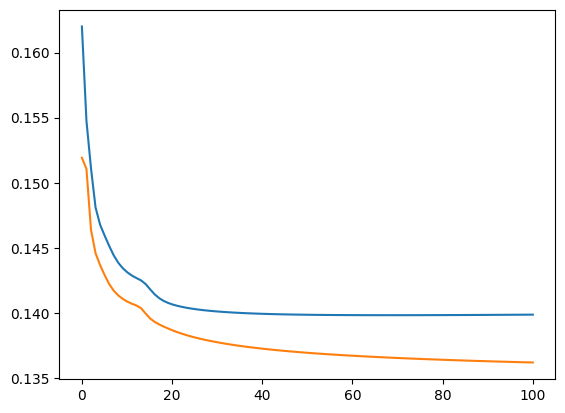

In [8]:
### Train and validation epochs

# Initialize variables
train_errors = []
AllEpochW = []
epochs = 100
min_error = 10000000000000

# Split validation data
val_inp = np.delete(arrayVal, np.s_[2:4], axis = 1)
val_Ys = np.delete(arrayVal, np.s_[0:2], axis = 1)
val_error = []

# Train
for epoch in range(epochs):
    sumerrors = 0
    sum_val_error = 0
    EpochWeights = []
    for i in range(len(inputs)):
        # Input layer
        x1 = neuron(inputs[i][0], [wu_input[0],wu_input[1],wu_input[2],wu_input[3],wu_input[4],wu_input[5],wu_input[6],wu_input[7]], None)
        x2 = neuron(inputs[i][1], [wu_input[8],wu_input[9],wu_input[10],wu_input[11],wu_input[12],wu_input[13],wu_input[14],wu_input[15]], None)
        weightsList = [x1.w, x2.w]

        v = []
        for j in range(len(weightsList[0])):
            v.append(weightProduct(weightsList, inputs[i])[j])

        # Hidden layer
        h1 = neuron(None, [wu_hidden[0],wu_hidden[1]], v[0])
        h2 = neuron(None, [wu_hidden[2],wu_hidden[3]], v[1])
        h3 = neuron(None, [wu_hidden[4],wu_hidden[5]], v[2])
        h4 = neuron(None, [wu_hidden[6],wu_hidden[7]], v[3])
        h5 = neuron(None, [wu_hidden[8],wu_hidden[9]], v[4])
        h6 = neuron(None, [wu_hidden[10],wu_hidden[11]], v[5])
        h7 = neuron(None, [wu_hidden[12],wu_hidden[13]], v[6])
        h8 = neuron(None, [wu_hidden[14],wu_hidden[15]], v[7])
        
        # Activation values
        av1 = h1.actFunction()
        av2 = h2.actFunction()
        av3 = h3.actFunction()
        av4 = h4.actFunction()
        av5 = h5.actFunction()
        av6 = h6.actFunction()
        av7 = h7.actFunction()
        av8 = h8.actFunction()
        avs = [av1, av2, av3, av4, av5, av6, av7, av8]
        weightsListH = [h1.w, h2.w, h3.w, h4.w, h5.w, h6.w, h7.w, h8.w]
        AllWeights = [weightsList, weightsListH]

        v = []
        for j in range(len(weightsListH[0])):
            v.append(weightProduct(weightsListH, avs)[j])

        # Output layer
        o1 = neuron(None, None, v[0])
        o2 = neuron(None, None, v[1])
        output1 = o1.actFunction()
        output2 = o2.actFunction()

        # Calculate errors
        e1 = Ys[i][0] - output1
        e2 = Ys[i][1] - output2
        error = ((e1+e2) ** 2) /2
        sumerrors += error

        errors = [e1, e2]
        
        outputs = [output1, output2]

        # Calculate gradients
        gradients1 = gradout(lmbd, errors, outputs)
        gradients2 = gradh(lmbd, avs, gradients1, weightsListH)

        # Store last weights
        wuLast = [wu_input, wu_hidden]
        wuLast = np.array(wuLast).flatten()

        # Update weights
        wu_input = weightUpdateLayer(gradients2, actList, weightsList, zita)
        wu_hidden = weightUpdateLayer(gradients1, avs, weightsListH, zita)
        

    ####### Validation #######
    for i in range(len(val_inp)):
        x1 = neuron(val_inp[i][0], [wuLast[0],wuLast[1],wuLast[2],wuLast[3],wuLast[4],wuLast[5],wuLast[6],wuLast[7]], None)
        x2 = neuron(val_inp[i][1], [wuLast[8],wuLast[9],wuLast[10],wuLast[11],wuLast[12],wuLast[13],wuLast[14],wuLast[15]], None)
        weightsList = [x1.w, x2.w]

        v = []
        for j in range(len(weightsList[0])):
            v.append(weightProduct(weightsList, val_inp[i])[j])


        h1 = neuron(None, [wuLast[16],wuLast[17]], v[0])
        h2 = neuron(None, [wuLast[18],wuLast[19]], v[1])
        h3 = neuron(None, [wuLast[20],wuLast[21]], v[2])
        h4 = neuron(None, [wuLast[22],wuLast[23]], v[3])
        h5 = neuron(None, [wuLast[24],wuLast[25]], v[4])
        h6 = neuron(None, [wuLast[26],wuLast[27]], v[5])
        h7 = neuron(None, [wuLast[28],wuLast[29]], v[6])
        h8 = neuron(None, [wuLast[30],wuLast[31]], v[7])
        av1 = h1.actFunction()
        av2 = h2.actFunction()
        av3 = h3.actFunction()
        av4 = h4.actFunction()
        av5 = h5.actFunction()
        av6 = h6.actFunction()
        av7 = h7.actFunction()
        av8 = h8.actFunction()
        avs = [av1, av2, av3, av4, av5, av6, av7, av8]
        weightsListH = [h1.w, h2.w, h3.w, h4.w, h5.w, h6.w, h7.w, h8.w]
        #AllWeights = [weightsList, weightsListH]

        v = []
        for j in range(len(weightsListH[0])):
            v.append(weightProduct(weightsListH, avs)[j])

        o1 = neuron(None, None, v[0])
        o2 = neuron(None, None, v[1])
        output1 = o1.actFunction()
        output2 = o2.actFunction()

            
        e1 = val_Ys[i][0] - output1
        e2 = val_Ys[i][1] - output2
        error = ((e1+e2)**2)/2
        sum_val_error += error
    ##########################
    val_epoch_e = math.sqrt(sum_val_error/len(val_inp))
    Epoch_error = math.sqrt(sumerrors/len(inputs))
    if Epoch_error < min_error:
        min_error = Epoch_error
        bw = AllWeights
    
    train_errors.append(Epoch_error)
    val_error.append(val_epoch_e)

    print("Epoch error: ", Epoch_error)
    print("Validation error: ", val_epoch_e)

bw = [element for sublist1 in bw for sublist2 in sublist1 for element in sublist2]

plt.plot(np.linspace(0,epochs,epochs),train_errors)
plt.plot(np.linspace(0,epochs,epochs),val_error)

print(np.mean(train_errors))
print(bw)

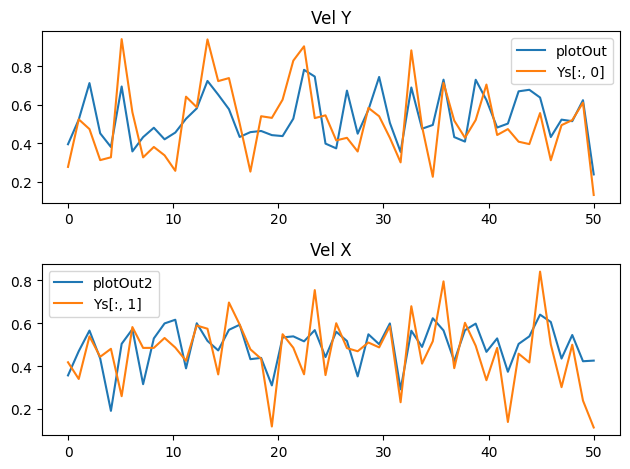

0.7616983071469372 -0.21364122362147575


In [9]:
## Test ##
plotOut = []
plotOut2 = []
inputs = np.delete(arrayTest, np.s_[2:4], axis = 1)     # Drop output columns
Ys = np.delete(arrayTest, np.s_[0:2], axis = 1)     # Drop input columns

for i in range(len(Ys)):

    # Input layer
    x1 = neuron(inputs[i][0], [bw[0],bw[1],bw[2],bw[3],bw[4],bw[5],bw[6],bw[7]], None)
    x2 = neuron(inputs[i][1], [bw[8],bw[9],bw[10],bw[11],bw[12],bw[13],bw[14],bw[15]], None)
    weightsList = [x1.w, x2.w]

    # Calculate v values
    v = []
    for j in range(len(weightsList[0])):
        v.append(weightProduct(weightsList, inputs[i])[j])

    # Hidden layer
    h1 = neuron(None, [bw[16],bw[17]], v[0])
    h2 = neuron(None, [bw[18],bw[19]], v[1])
    h3 = neuron(None, [bw[20],bw[21]], v[2])
    h4 = neuron(None, [bw[22],bw[23]], v[3])
    h5 = neuron(None, [bw[24],bw[25]], v[4])
    h6 = neuron(None, [bw[26],bw[27]], v[5])
    h7 = neuron(None, [bw[28],bw[29]], v[6])
    h8 = neuron(None, [bw[30],bw[31]], v[7])
    
    # Activation values
    av1 = h1.actFunction()
    av2 = h2.actFunction()
    av3 = h3.actFunction()
    av4 = h4.actFunction()
    av5 = h5.actFunction()
    av6 = h6.actFunction()
    av7 = h7.actFunction()
    av8 = h8.actFunction()
    avs = [av1, av2, av3, av4, av5, av6, av7, av8]
    weightsListH = [h1.w, h2.w, h3.w, h4.w, h5.w, h6.w, h7.w, h8.w]
    
    v = []
    for j in range(len(weightsListH[0])):
        v.append(weightProduct(weightsListH, avs)[j])

    # Output layer
    o1 = neuron(None, None, v[0])
    o2 = neuron(None, None, v[1])
    output1 = o1.actFunction()
    output2 = o2.actFunction()

    # Calculate errors
    e1 = Ys[i][0] - output1
    e2 = Ys[i][1] - output2

    # Store outputs
    plotOut.append(output1)
    plotOut2.append(output2)

    errors = [e1, e2]
    outputs = [output1, output2]

# Plot outputs
plt.subplot(2, 1, 1)
plt.plot(np.linspace(0, 50, 50), plotOut[0:50], label='plotOut')
plt.plot(np.linspace(0, 50, 50), Ys[0:50, 0], label='Ys[:, 0]')
plt.legend()
plt.title('Vel Y')

plt.subplot(2, 1, 2)
plt.plot(np.linspace(0, 50, 50), plotOut2[0:50], label='plotOut2')
plt.plot(np.linspace(0, 50, 50), Ys[0:50, 1], label='Ys[:, 1]')
plt.legend()
plt.title('Vel X')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

len(inputs)
len(Ys)
print(output1, e1)